# Analysis of estimated health prices

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import csv

## Estimated health prices

In [2]:
# All countries: Administrative costs
countries = ['de','dk','fr','it','nl','se','sp','us']
euro = ['de','dk','fr','it','nl','se','sp']
stats = ['price','iota','hosp']
table = pd.DataFrame(index=countries,columns=stats)

In [3]:
# European Countries and health market institutions
statd  = ['price','comp','regu','quali','DemManag','pay']
tabled = pd.DataFrame(index=euro,columns=statd) #countries[0:7]

In [4]:
# Table of estimated prices
p_com   = ['beta','psi','sigma','phi']
p_name  = ['d1','d2','p','tfp']
# loading results from estimation
pars = pd.read_pickle('../output_JPE/pars.pkl')
pars

,de,dk,fr,it,nl,se,sp,us
beta,0.970000,0.970000,0.970000,0.970000,0.970000,0.970000,0.970000,0.970000
psi,0.161578,0.161578,0.161578,0.161578,0.161578,0.161578,0.161578,0.161578
sigma,2.105317,2.105317,2.105317,2.105317,2.105317,2.105317,2.105317,2.105317
phi,0.397405,0.397405,0.397405,0.397405,0.397405,0.397405,0.397405,0.397405
d1,-1.282523,-1.602088,-1.099845,-0.831846,-1.390736,-1.394792,0.002353,-0.988958
d2,4.029535,4.273080,3.786290,3.917407,3.992196,4.310991,3.434494,3.511651
p,0.836301,0.888409,0.604059,0.695076,0.657280,0.891689,0.642584,1.000000
tfp,1.011023,1.260592,0.922111,0.613212,0.989482,0.795415,0.795095,1.000000


In [5]:
price_health = pars.loc['p',:]
table.loc[:,'price']= price_health

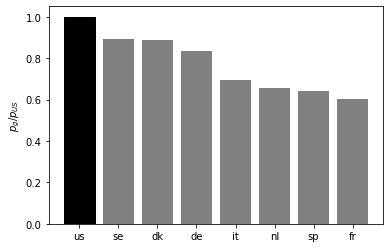

In [6]:
tablep = table.sort_values('price',ascending=False)
plt.figure()
b = plt.bar(tablep.index,tablep['price'],color='grey')
b[0].set_color('black')
plt.ylabel('$p_g/p_{US}$')
#plt.savefig('../figures_JPE/price_heatlh.eps')
plt.show()

In [7]:
AdmiCost  = np.array([ 5.5, 1.2, 7.0, 1.2, 4.2, 1.5, 3.1, 7.4]) 
AdmiCostH = np.array([ 9.00, np.nan, 8.77, np.nan, 10.85, np.nan, np.nan, 15.51]) 
table.loc[:,'iota']= AdmiCost/AdmiCost[-1]
table.loc[:,'hosp']= AdmiCostH/AdmiCostH[-1]

In [8]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(table.loc[:,'price'],table.loc[:,'iota'])
print("slope: %f    intercept: %f   R-squared: %f" % (slope, intercept, r_value**2))

slope: 0.051199    intercept: 0.485560   R-squared: 0.000467


In [9]:
slopeH, interceptH, r_valueH, p_valueH, std_errH = stats.linregress(table.loc[['de','fr','nl','us'],'price'],table.loc[['de','fr','nl','us'],'hosp'])
print("slope: %f    intercept: %f   R-squared: %f" % (slopeH, interceptH,r_valueH**2))

slope: 0.854110    intercept: 0.049884   R-squared: 0.583107


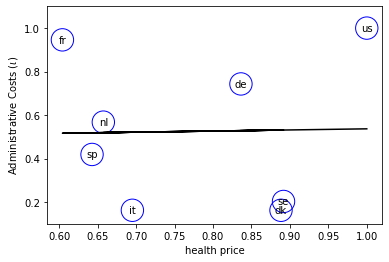

In [10]:
plt.figure()
plt.scatter(table.loc[:,'price'],table.loc[:,'iota'],facecolors='none', edgecolors='b',s=500.0)
plt.plot(table.loc[:,'price'], intercept + slope*table.loc[:,'price'], 'k')
plt.ylim(0.1,1.1)
plt.ylabel('Administrative Costs ($\iota$)')
plt.xlabel('health price')
for x,y,z in zip(table.loc[:,'price'],table.loc[:,'iota'],countries):
    plt.annotate(z,xy=(x, y),horizontalalignment='center', verticalalignment='center')
#plt.savefig('../figures_JPE/price_iota.png',dpi=600)

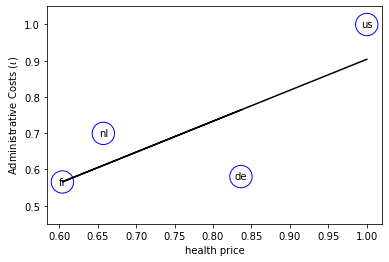

In [11]:
plt.figure()
plt.scatter(table.loc[:,'price'],table.loc[:,'hosp'],facecolors='none', edgecolors='b',s=500.0)
plt.plot(table.loc[['de','fr','nl','us'],'price'], interceptH + slopeH*table.loc[['de','fr','nl','us'],'price'], 'k')
plt.ylim(0.45,1.05)
plt.ylabel('Administrative Costs ($\iota$)')
plt.xlabel('health price')
for x,y,z in zip(table.loc[:,'price'],table.loc[:,'hosp'],countries):
    plt.annotate(z,xy=(x, y),horizontalalignment='center', verticalalignment='center')
#plt.savefig('../figures_JPE/price_hosp.png',dpi=600)

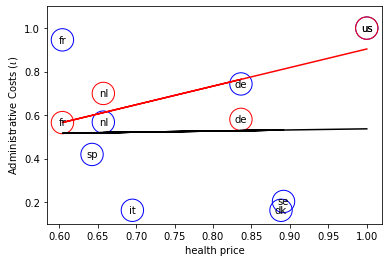

In [24]:
plt.figure()
plt.scatter(table.loc[:,'price'],table.loc[:,'iota'],facecolors='none', edgecolors='b',s=500.0)
plt.plot(table.loc[:,'price'], intercept + slope*table.loc[:,'price'], 'k')
plt.ylim(0.1,1.1)
plt.ylabel('Administrative Costs ($\iota$)')
plt.xlabel('health price')
for x,y,z in zip(table.loc[:,'price'],table.loc[:,'iota'],countries):
    plt.annotate(z,xy=(x, y),horizontalalignment='center', verticalalignment='center')
plt.scatter(table.loc[:,'price'],table.loc[:,'hosp'],facecolors='none', edgecolors='r',s=500.0)
plt.plot(table.loc[['de','fr','nl','us'],'price'], interceptH + slopeH*table.loc[['de','fr','nl','us'],'price'], 'r')
#plt.ylim(0.45,1.05)
plt.ylabel('Administrative Costs ($\iota$)')
plt.xlabel('health price')
for x,y,z in zip(table.loc[:,'price'],table.loc[:,'hosp'],countries):
    plt.annotate(z,xy=(x, y),horizontalalignment='center', verticalalignment='center')
plt.show()

## Health marlet institutions: European countries

In [12]:
typeReg = ['Physician payment',
'Hospital payment',
'Incentives for quality',
'Choice among providers',
'User choice of insurer',
'Lever',
'Regulation of physician supply',
'Regulation of capital investment',
'Regulation of price for physician services',
'Regulation of price for hospital services',
'Regulation of pharmaceutical price',
'Regulation of prices charged to third-party',
'Stringency of budget constraint',
'Control of volume',
'Gatekeeping',
'Depth of basic insurance',
'Definition of benefit basket',
'Public health objectives',
'Use of health technology assessment',
'Degree of decentralisation']

In [13]:
RegInd = np.array([
[4.5, 5.0, 0.0, 5.3, 6.0, 5.0, 3.6, 4.0, 3.0, 3.0, 1.0, 3.7, 2.0, 2.0, 3.0, 5.6, 4.0, 0.1, 3.6, 1.5],
[2.5, 1.0, 0.5, 2.0, 1.0, 0.0, 4.8, 4.0, 4.0, 5.0, 1.0, 4.0, 2.0, 1.7, 6.0, 5.3, 2.5, 2.4, 6.0, 2.3],
[4.5, 5.0, 0.5, 6.0, 2.0, 0.3, 4.8, 4.0, 4.0, 3.0, 5.0, 5.0, 2.0, 1.7, 3.0, 5.2, 5.0, 5.4, 4.0, 0.0],
[1.0, 5.0, 1.0, 6.0, 0.0, 0.0, 4.8, 6.0, 3.0, 5.0, 5.0, 4.2, 5.0, 2.3, 6.0, 5.4, 5.0, 0.9, 3.6, 2.3],
[5.5, 1.0, 1.5, 5.0, 4.0, 5.0, 4.8, 1.5, 2.0, 5.0, 5.0, 3.2, 2.0, 1.0, 6.0, 5.7, 5.0, 0.0, 6.0, 0.0],
[0.5, 0.0, 1.0, 0.7, 1.0, 0.0, 3.6, 4.0, 4.0, 5.0, 5.0, 4.5, 2.0, 3.0, 6.0, 5.4, 5.0, 0.1, 4.7, 5.5],
[0.0, 3.0, 1.2, 6.0, 0.0, 0.0, 2.4, 2.9, 4.0, 5.0, 5.0, 4.5, 6.0, 2.3, 0.0, 4.9, 2.5, 0.1, 4.0, 4.3],
])

In [14]:
tableR = pd.DataFrame(index=countries[0:7],columns=typeReg)

for ii in range(20):
    tableR.loc[:,typeReg[ii]] = RegInd[:,ii]

In [15]:
tableR

,Physician payment,Hospital payment,Incentives for quality,Choice among providers,User choice of insurer,Lever,Regulation of physician supply,Regulation of capital investment,Regulation of price for physician services,Regulation of price for hospital services,Regulation of pharmaceutical price,Regulation of prices charged to third-party,Stringency of budget constraint,Control of volume,Gatekeeping,Depth of basic insurance,Definition of benefit basket,Public health objectives,Use of health technology assessment,Degree of decentralisation
de,4.5,5.0,0.0,5.3,6.0,5.0,3.6,4.0,3.0,3.0,1.0,3.7,2.0,2.0,3.0,5.6,4.0,0.1,3.6,1.5
dk,2.5,1.0,0.5,2.0,1.0,0.0,4.8,4.0,4.0,5.0,1.0,4.0,2.0,1.7,6.0,5.3,2.5,2.4,6.0,2.3
fr,4.5,5.0,0.5,6.0,2.0,0.3,4.8,4.0,4.0,3.0,5.0,5.0,2.0,1.7,3.0,5.2,5.0,5.4,4.0,0.0
it,1.0,5.0,1.0,6.0,0.0,0.0,4.8,6.0,3.0,5.0,5.0,4.2,5.0,2.3,6.0,5.4,5.0,0.9,3.6,2.3
nl,5.5,1.0,1.5,5.0,4.0,5.0,4.8,1.5,2.0,5.0,5.0,3.2,2.0,1.0,6.0,5.7,5.0,0.0,6.0,0.0
se,0.5,0.0,1.0,0.7,1.0,0.0,3.6,4.0,4.0,5.0,5.0,4.5,2.0,3.0,6.0,5.4,5.0,0.1,4.7,5.5
sp,0.0,3.0,1.2,6.0,0.0,0.0,2.4,2.9,4.0,5.0,5.0,4.5,6.0,2.3,0.0,4.9,2.5,0.1,4.0,4.3


In [16]:
tabled.loc[:,'price']  = price_health[0:7]

tabled.loc[:,'regu']   = np.sum(tableR.loc[:,[
'Physician payment',
'Hospital payment',
'Regulation of physician supply',
'Regulation of capital investment',
'Regulation of price for physician services',
'Regulation of price for hospital services',
'Regulation of pharmaceutical price',
'Regulation of prices charged to third-party'
]],1)/8

tabled.loc[:,'quali']  = tableR.loc[:,typeReg[2]]

tabled.loc[:,'markup'] = np.array([1.01803, 0.675261, 0.310128, 0.464998, 0.372489, 0.561001,0.287985])

tabled.loc[:,'DemManag'] = np.sum(tableR.loc[:,[
#'Control of volume', # +
#'Gatekeeping', # +
'Definition of benefit basket',  # -
'Public health objectives' # -
#'Use of health technology assessment', #+
#'Degree of decentralisation'
]],1)/2#6

tabled.loc[:,'pay'] = np.sum(tableR.loc[:,[
'Physician payment',
'Hospital payment'
]],1)/2

In [17]:
# Phys. pay
comp1 = np.array([4.5, 2.5, 4.5, 1.0, 5.5, 0.5, 0.0])
# Hosp pay.
comp2 = np.array([5.0, 1.0, 5.0, 5.0, 1.0, 0.0, 3.0])
# Choice among providers
comp3 = np.array([5.3, 2.0, 6.0, 6.0, 5.0, 0.7, 6.0])
# Choice among insurer
comp4 = np.array([6.0, 1.0, 2.0, 0.0, 4.0, 1.0, 0.0])
# Compet on insuarnce market
comp5 = np.array([5.0, 0.0, 0.3, 0.0, 5.0, 0.0, 0.0])
# degree of decentralization
comp6 = np.array([1.5, 2.3, 0.0, 2.3, 0.0, 5.5, 4.3])

tabled.loc[:,'comp'] = comp3 #(comp1+comp2+comp3+comp4+comp5)/5

In [18]:
tabled

,price,comp,regu,quali,DemManag,pay,markup
de,0.836301,5.3,3.4750,0.0,2.05,4.75,1.018030
dk,0.888409,2.0,3.2875,0.5,2.45,1.75,0.675261
fr,0.604059,6.0,4.4125,0.5,5.20,4.75,0.310128
it,0.695076,6.0,4.2500,1.0,2.95,3.00,0.464998
nl,0.657280,5.0,3.5000,1.5,2.50,3.25,0.372489
se,0.891689,0.7,3.3250,1.0,2.55,0.25,0.561001
sp,0.642584,6.0,3.3500,1.2,1.30,1.50,0.287985


In [19]:
from scipy import stats

print("price and competition")
slopec, interceptc, r_value, p_value, std_err = stats.linregress(tabled.loc[:,'price'], tabled.loc[:,'comp'])
print("slope: %f    p-value: %f    intercept: %f   R-squared: %f" % (slopec, p_value, interceptc,r_value**2))

print("price and regulation")
sloper, interceptr, r_value, p_value, std_err = stats.linregress(tabled.loc[:,'price'], tabled.loc[:,'regu'])
print("slope: %f    p-value: %f    intercept: %f   R-squared: %f" % (sloper, p_value, interceptr,r_value**2))

print("price and quality controls")
slopeq, interceptq, r_value, p_value, std_err = stats.linregress(tabled.loc[:,'price'], tabled.loc[:,'quali'])
print("slope: %f    p-value: %f    intercept: %f   R-squared: %f" % (slopeq, p_value, interceptq,r_value**2))

print("price and Management")
sloped, interceptd, r_value, p_value, std_err = stats.linregress(tabled.loc[:,'price'], tabled.loc[:,'DemManag'])
print("slope: %f    p-value: %f    intercept: %f   R-squared: %f" % (slopeq, p_value, interceptq,r_value**2))

print("price and Payments")
slopep, interceptp, r_value, p_value, std_err = stats.linregress(tabled.loc[:,'price'], tabled.loc[:,'pay'])
print("slope: %f    p-value: %f    intercept: %f   R-squared: %f" % (slopeq, p_value, interceptq,r_value**2))

print("markup and competition")
slopeqm, interceptqm, r_value, p_value, std_err = stats.linregress(tabled.loc[:,'markup'], tabled.loc[:,'comp'])
print("slope: %f    p-value: %f    intercept: %f   R-squared: %f" % (slopeq, p_value, interceptq,r_value**2))

print("markup and competition")
slopeqm1, interceptqm1, r_value, p_value, std_err = stats.linregress(tabled.loc[['dk','fr','it','nl','se','sp'],'markup'], tabled.loc[['dk','fr','it','nl','se','sp'],'comp'])
print("slope: %f    p-value: %f    intercept: %f   R-squared: %f" % (slopeq, p_value, interceptq,r_value**2))


price and competition
slope: -14.584952    p-value: 0.021745    intercept: 15.295189   R-squared: 0.683855
price and regulation
slope: -2.299675    p-value: 0.151433    intercept: 5.370531   R-squared: 0.364095
price and quality controls
slope: -1.723877    p-value: 0.350971    intercept: 2.098672   R-squared: 0.174556
price and Management
slope: -1.723877    p-value: 0.429684    intercept: 2.098672   R-squared: 0.128549
price and Payments
slope: -1.723877    p-value: 0.334522    intercept: 2.098672   R-squared: 0.185631
markup and competition
slope: -1.723877    p-value: 0.532490    intercept: 2.098672   R-squared: 0.082407
markup and competition
slope: -1.723877    p-value: 0.044453    intercept: 2.098672   R-squared: 0.676541


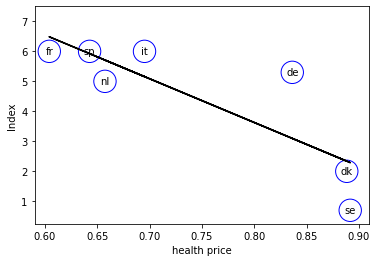

In [20]:
plt.figure()
plt.scatter(tabled['price'],tabled['comp'],facecolors='none', edgecolors='b',s=500.0)
#sns.regplot(tabled['price'],tabled['comp'], ci=95, color='none', marker=" ")#color ='blue', marker="o", label=countries)
plt.plot(tabled['price'], interceptc + slopec*tabled['price'], 'k')
plt.xlim(0.59,0.91)
plt.ylim(0.25,7.5)
plt.xlabel('health price')
plt.ylabel('Index')
for x,y,z in zip(tabled['price'],tabled['comp'],countries):
    plt.annotate(z,xy=(x, y),horizontalalignment='center', verticalalignment='center')
#plt.savefig('../figures_JPE/comp_price.png',dpi=600)

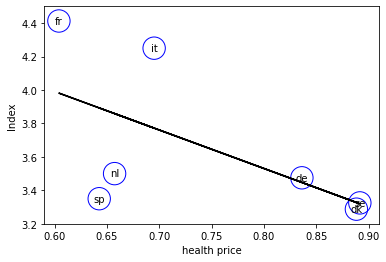

In [21]:
plt.scatter(tabled['price'],tabled['regu'],facecolors='none', edgecolors='b',s=500.0)
#sns.regplot(tabled['price'],tabled['regu'], color='none', marker=" ")#color ='blue', marker="o", label=countries)
plt.plot(tabled['price'], interceptr + sloper*tabled['price'], 'k')
plt.xlabel('health price')
plt.ylabel('Index')
#plt.xlim(0.59,0.91)
#plt.ylim(2.9,4.8)
plt.xlim(0.59,0.91)
plt.ylim(3.2,4.5)
for x,y,z in zip(tabled['price'],tabled['regu'],countries):
    plt.annotate(z,xy=(x, y),horizontalalignment='center', verticalalignment='center')
#plt.savefig('../figures_JPE/reg_price.png',dpi=600)

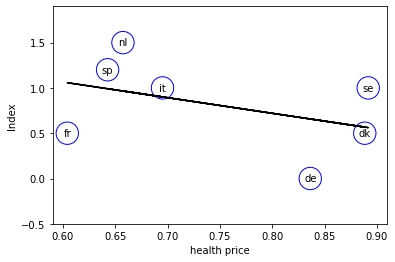

In [22]:
plt.scatter(tabled['price'],tabled['quali'],facecolors='none', edgecolors='b',s=500.0)
#sns.regplot(tabled['price'],tabled['quali'], color='none', marker=" ")#color ='blue', marker="o", label=countries)
plt.plot(tabled['price'], interceptq + slopeq*tabled['price'], 'k')
plt.xlabel('health price')
plt.ylabel('Index')
plt.xlim(0.59,0.91)
plt.ylim(-0.5,1.9)
for x,y,z in zip(tabled['price'],tabled['quali'],countries):
    plt.annotate(z,xy=(x, y),horizontalalignment='center', verticalalignment='center')
#plt.savefig('../figures_JPE/qual_price.png',dpi=600)